In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5

In [2]:
stalling_change = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte/Results/Tables/Ribosome_stalling/v20230730/adi_stalling-change_FEresult_addinfo.tsv', sep='\t')
display(stalling_change)

,transcript_id,asite,reltostart-asite,codon-asite,aa-asite,D4_OR,D4_p,D4_FDR,D8_OR,D8_p,D8_FDR
0,ENSMUST00000000001.5,174,33,GCG,A,0.308259,0.356685,1.0,0.774119,1.000000,1.0
1,ENSMUST00000000001.5,177,36,GUG,V,0.926156,1.000000,1.0,1.161905,1.000000,1.0
2,ENSMUST00000000001.5,180,39,GAG,E,0.000000,0.231122,1.0,1.744579,0.667567,1.0
3,ENSMUST00000000001.5,186,45,AGC,S,0.462733,0.611056,1.0,0.580519,1.000000,1.0
4,ENSMUST00000000001.5,189,48,AAG,K,0.000000,0.480845,1.0,2.325823,0.599013,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1885452,ENSMUST00000239525.1,4271,4140,UCU,S,NaN,1.000000,1.0,NaN,1.000000,1.0
1885453,ENSMUST00000239525.1,5324,5193,GCG,A,NaN,1.000000,1.0,NaN,1.000000,1.0
1885454,ENSMUST00000239525.1,8915,8784,CGC,R,NaN,1.000000,1.0,inf,0.156825,1.0
1885455,ENSMUST00000239525.1,9041,8910,GUG,V,NaN,1.000000,1.0,NaN,1.000000,1.0


In [3]:
# Volcano plot options
p_cutoff = -np.log10(0.01)
logFC_cutoff = 0
OR_cutoff = 1

# Pie chart data
top = 5
pie_plot_data = {}
for day in ['4','8']:
    ratio  = list(stalling_change[ (stalling_change[f'D{day}_FDR']<0.01) & (stalling_change[f'D{day}_OR']>1) ].value_counts('aa-asite').values)
    labels = list(stalling_change[ (stalling_change[f'D{day}_FDR']<0.01) & (stalling_change[f'D{day}_OR']>1) ].value_counts('aa-asite').keys())

    pie_plot_data[day] = {'ratio' : ratio[:top]+[sum(ratio[top:])],
                          'labels': labels[:top]+['']}

explode = [0.1]+[0]*top
wedgeprops={'width': 0.9, 'edgecolor': 'w', 'linewidth': 0.5}

/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/daehwa/miniconda3/envs/univ/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


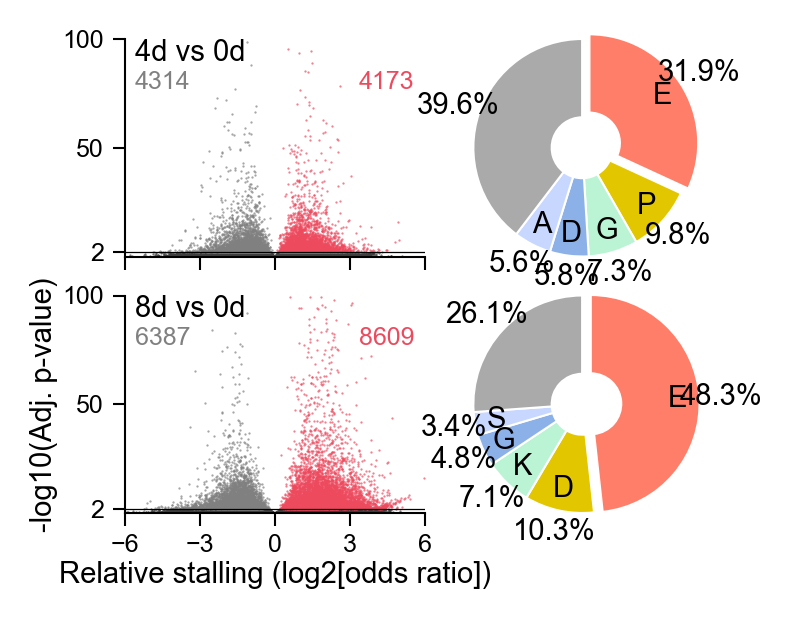

In [4]:
sF = 1 # Size factor
wgap = 0.15
hgap = 0.13
nrow, ncol = 2, 2

width_ratios  = [1, 0.75]
height_ratios = [0.725, 0.725]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
for day in ['4','8']:

    plot_data = stalling_change[['transcript_id', 'reltostart-asite', 'codon-asite', 'aa-asite', f'D{day}_OR', f'D{day}_FDR']].rename(columns={f'D{day}_OR':'OR', f'D{day}_FDR':'FDR'})

    plot_data['log2_OR'] = np.log2(plot_data['OR'])
    plot_data['-log10_FDR'] = -np.log10(plot_data['FDR'])

    up    = (plot_data['OR'] >= OR_cutoff) & (plot_data['-log10_FDR'] >= p_cutoff)
    down  = (plot_data['OR'] <= OR_cutoff) & (plot_data['-log10_FDR'] >= p_cutoff)
    other = (plot_data['-log10_FDR'] < p_cutoff)

    ax = fig.add_subplot(grid[row, col])

    # #F8071D #ED4A5E #6F5BA8
    ax.scatter(plot_data[other]['log2_OR'],     plot_data[other]['-log10_FDR'],     c='#404040',      s=0.3, alpha = 0.7, lw=0, rasterized=True)#, edgecolor='b', linewidths = 0.5)
    ax.scatter(plot_data[down]['log2_OR'],      plot_data[down]['-log10_FDR'],      c='#808080',      s=0.3, alpha = 0.7, lw=0, rasterized=True)#, edgecolor='b', linewidths = 0.5)
    ax.scatter(plot_data[up]['log2_OR'],        plot_data[up]['-log10_FDR'],        c='#ED4A5E',      s=0.3, alpha = 0.7, lw=0, edgecolors='k', rasterized=True)#, edgecolor='r', linewidths = 0.5)
    ax.axhline(2, c='k', lw=0.3)

    ax.set_xlim(-6,6)
    ax.set_ylim(0,100)
    ax.set_xticks([-6,-3,0,3,6])
    ax.set_yticks([2,50,100])
    ax.set_yticklabels([2,50,100])
    ax.tick_params(length=3, width=0.5, pad=2)
    if row==0 : ax.set_xticklabels([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)    

    if row==1: 
        ax.set_ylabel('-log10(Adj. p-value)', labelpad=1)
        ax.set_xlabel('Relative stalling (log2[odds ratio])', labelpad=1)

    xpos = 0.93 * ax.get_xlim()[1]
    ypos = 0.8 * ax.get_ylim()[1]
    ypos2 = ax.get_ylim()[1]
    ax.text(xpos,  ypos, len(plot_data[up]),   horizontalalignment='right', verticalalignment='center', fontsize=6, color='#ED4A5E')
    ax.text(-xpos, ypos, len(plot_data[down]), horizontalalignment='left',  verticalalignment='center', fontsize=6, color='#808080')
    ax.text(-xpos, ypos2, f'{day}d vs 0d', horizontalalignment='left',  verticalalignment='top', fontsize=7, color='k')

    row += 1


row = 0
col = 1
for day in ['4','8']:
    # Pie chart
    ax = fig.add_subplot(grid[row,col])
    ax.pie(pie_plot_data[day]['ratio'], 
            labels=pie_plot_data[day]['labels'], labeldistance=0.8,
            radius=1.25,
            colors=['#FF7E69','#E2C700','#BAF4D4','#8BB1E8','#C7D7FF','#AAAAAA'],
            autopct='%.1f%%', pctdistance=1.2,
            textprops = dict(va='center', ha='center', fontsize=7),
            startangle=90, counterclock=False, wedgeprops=wedgeprops, explode=explode)
    
    tmp = sum(pie_plot_data[day]['ratio'])
    # ax.set_title(f'Ribosome\nstalling sites\n({day}d, n={tmp})')

    row+=1


plt.savefig('stalling_change_volcano-pie.pdf', bbox_inches='tight')
plt.show()
plt.close()